In [27]:
print('Anna Marie Rooney')

print('19333456')

print('Assignment One, part one, Hutzler')

Anna Marie Rooney
19333456
Assignment One, part one, Hutzler


In [28]:
!pip install matplotlib

In [29]:
#defining the functions
import numpy as np

import matplotlib.pyplot as plt

#cos 
def y(x) :
   f= np.cos(x)
   return f

#derivative of cos x
def dy(x):
    j= -np.sin(x)
    return j

#second derivative of cos x
def dy2(x):
    j= -np.sin(x)
    return j

#e func
def g(x):
    f= np.exp(x) 
    return f

#e derivative
def dg(x):
    j= np.exp(x)
    return j

#forward difference
def fd(func, t, h):
    c = (func(t+h) - func(t))/h
    return c

#central difference    
def cd(func, t, h):
    c = (func(t+(h/2)) - func(t-(h/2)))/h
    return c

# central difference for the second derivative
def cd2(func, t, h):
    if h < np.finfo(float).eps:
        print("h is smaller than epsilon, cd2 function returning float.")  
        return np.nan  
    f = (func(t+h)+func(t-h)-2*func(t))/(h**2)
    return f

#the absolute difference between the method and the function
def dif(method, func, t,h):
    l = abs(method(func, t,h) - func(t))
    return l

#log of difference of difference minus the derivative
def logdif(func, t, h):
    difference = dif(func, t, h)  #calculate the absolute difference. 
    if difference > 0:
        return np.log10(difference)  #take log 10 if positive
    else:
        return np.nan  #return nan if the difference is negative or 0 to avoid log errors

    

In [30]:
#!pip install pandas
import pandas as pd


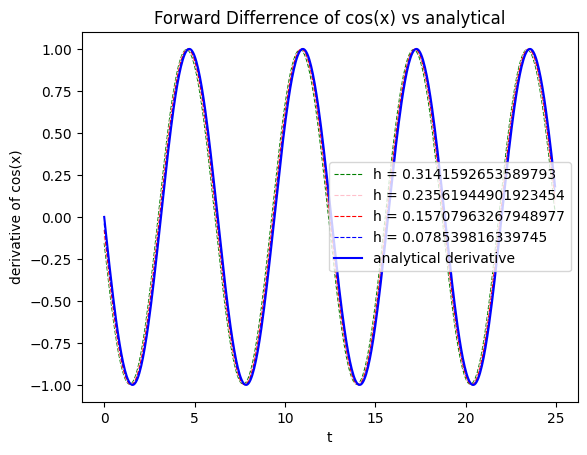

round  0


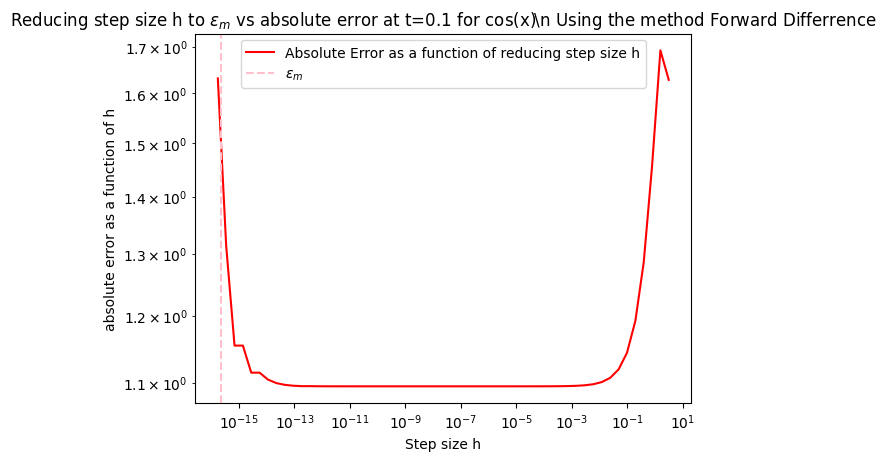

round  1


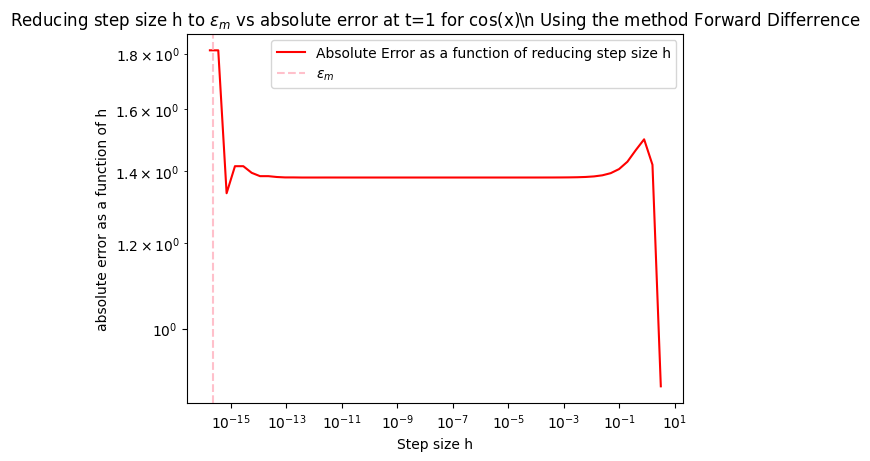

round  2


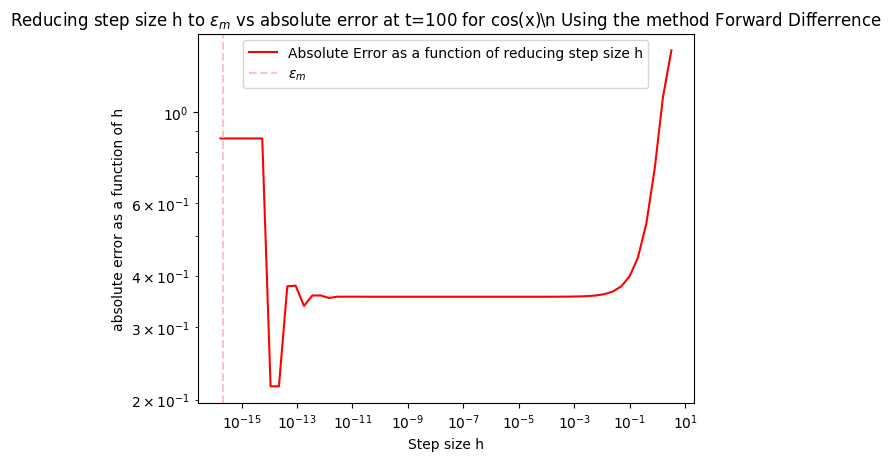

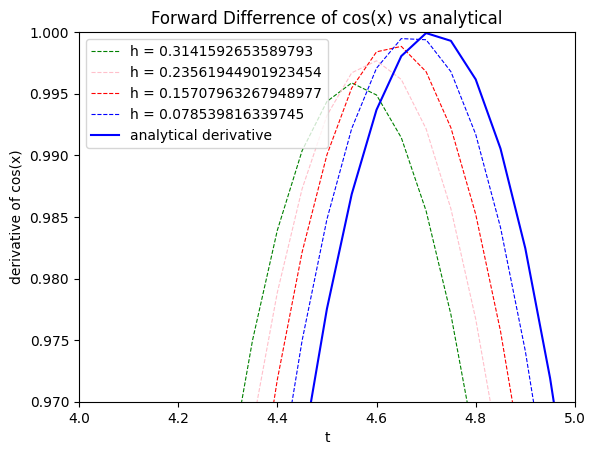

round  0


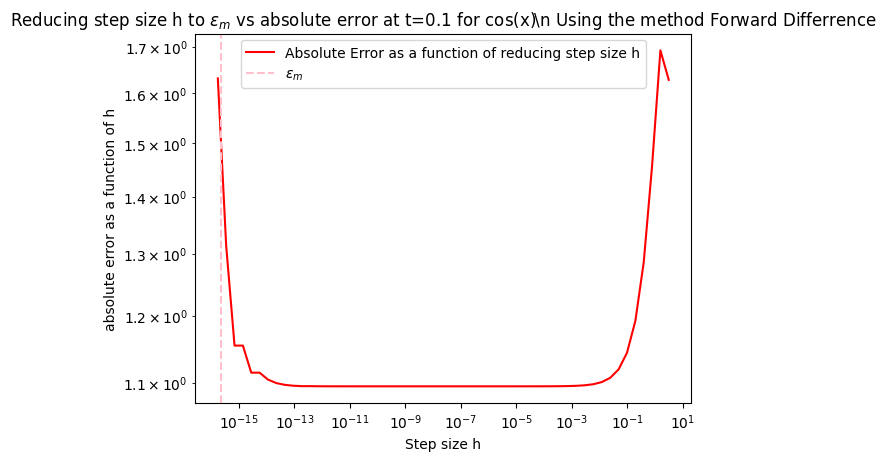

round  1


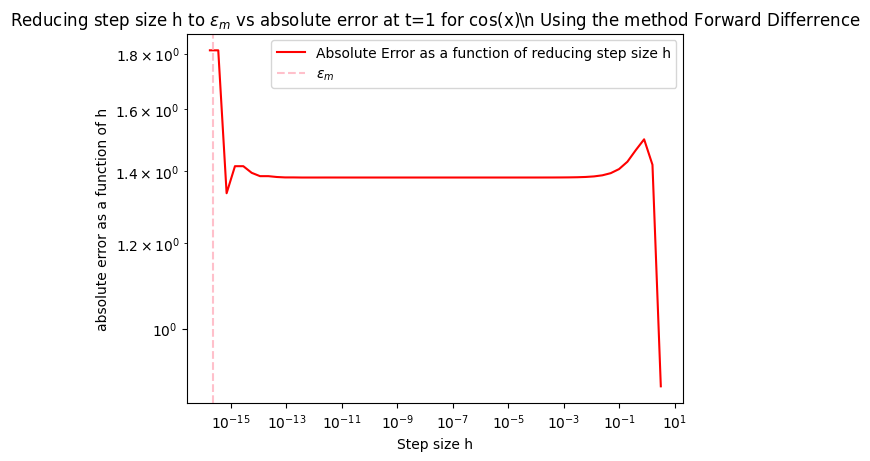

round  2


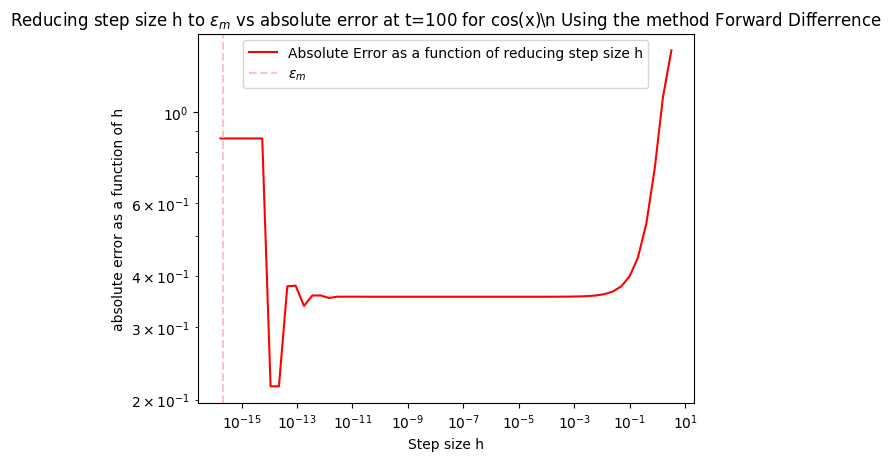

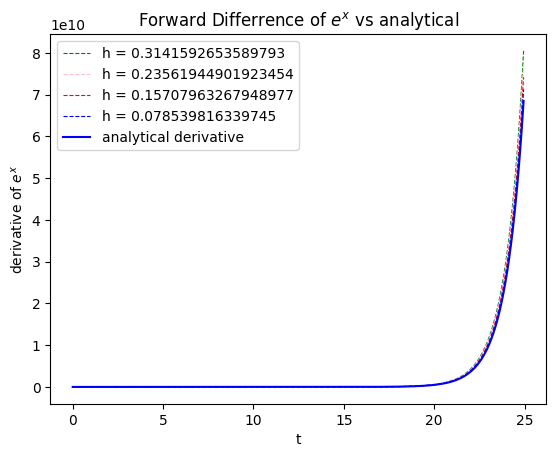

round  0


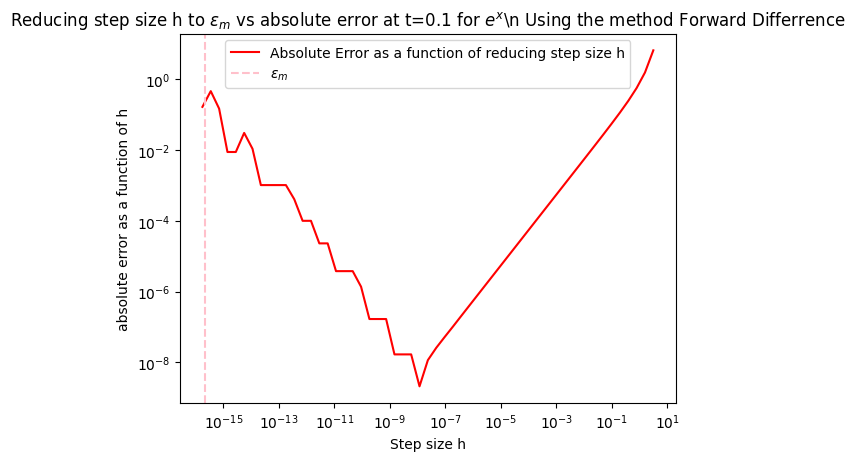

round  1


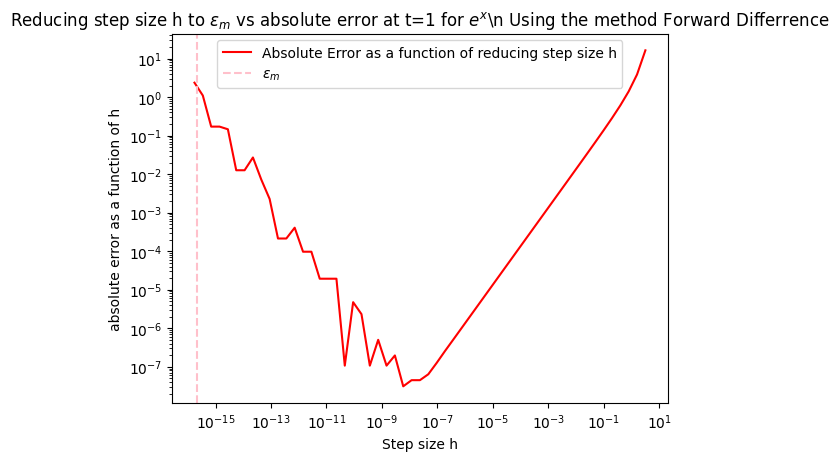

round  2


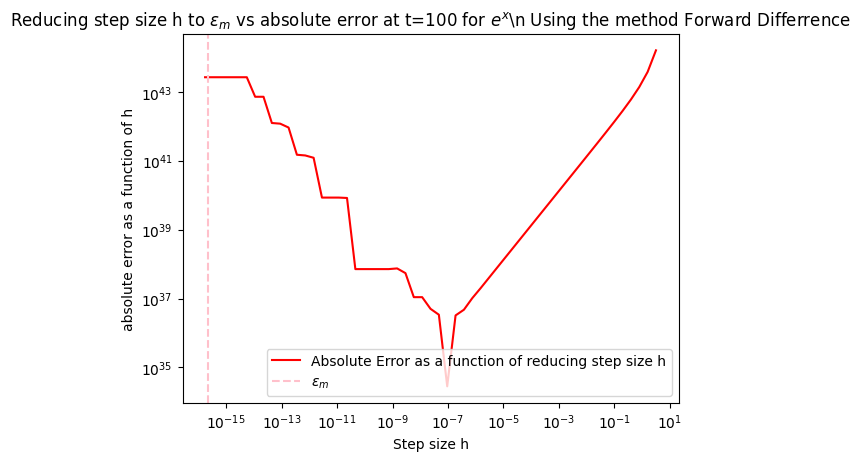

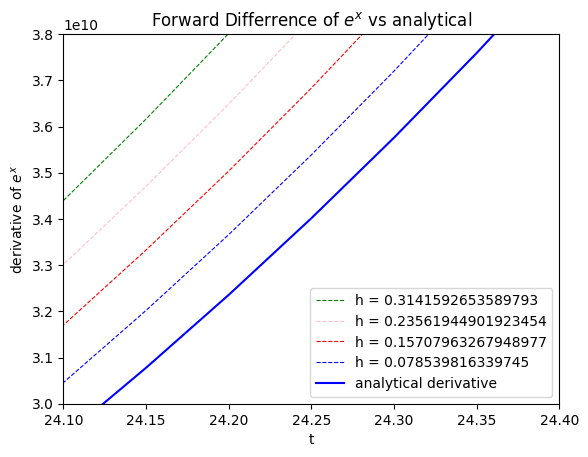

round  0


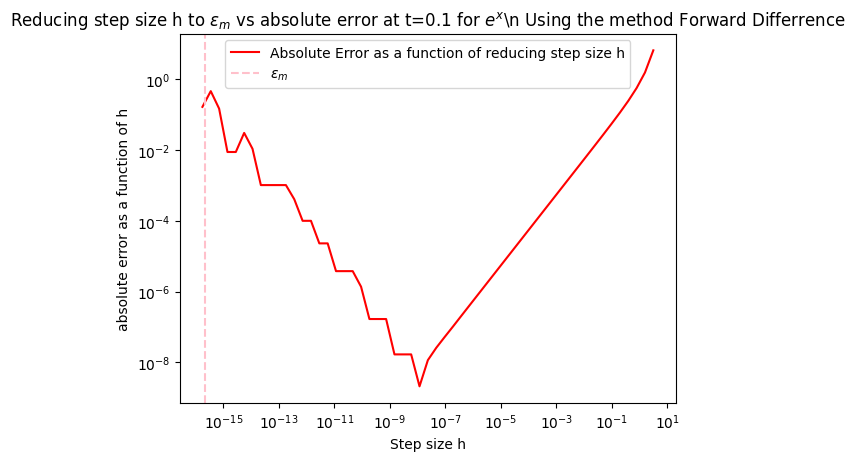

round  1


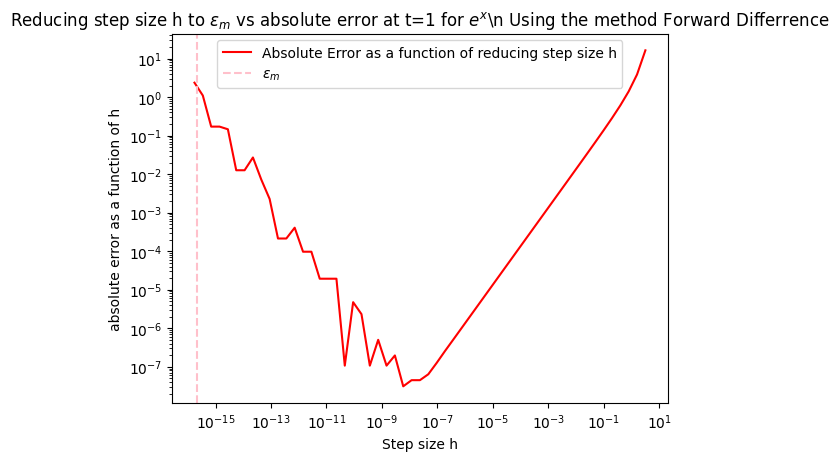

round  2


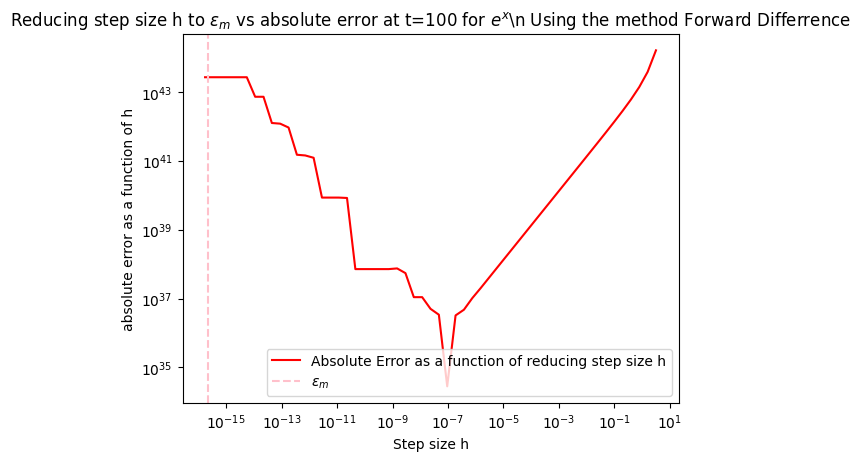

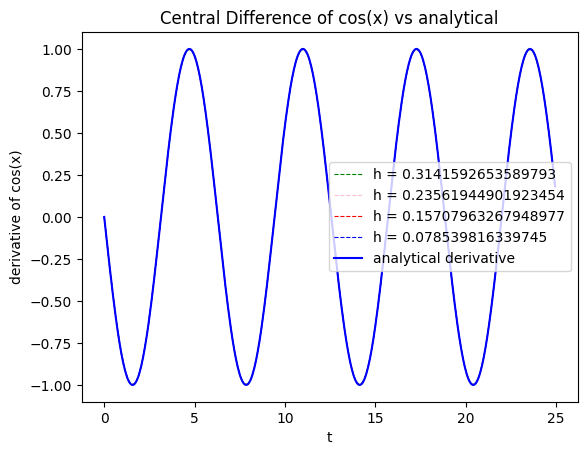

round  0


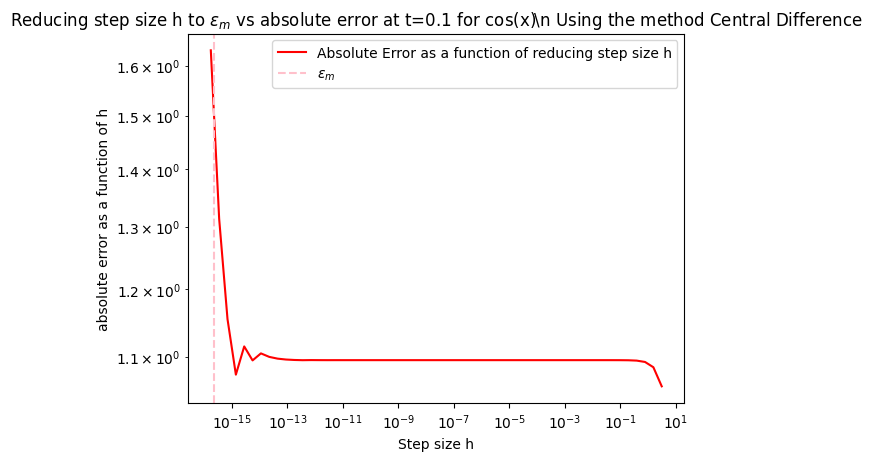

round  1


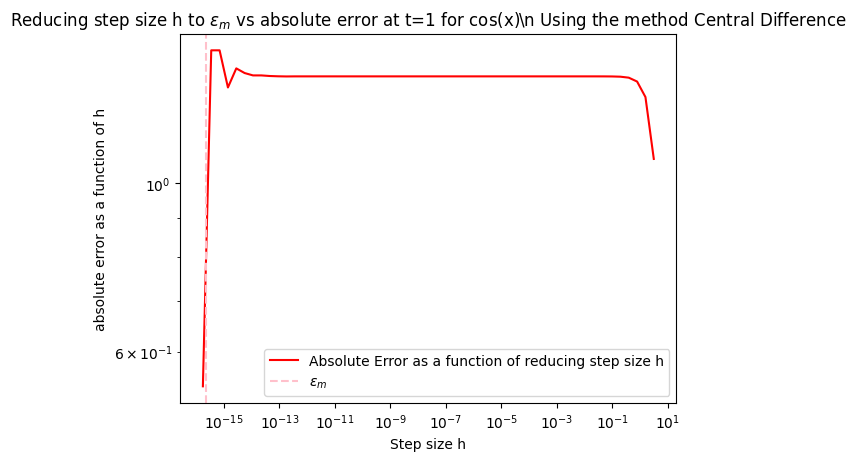

round  2


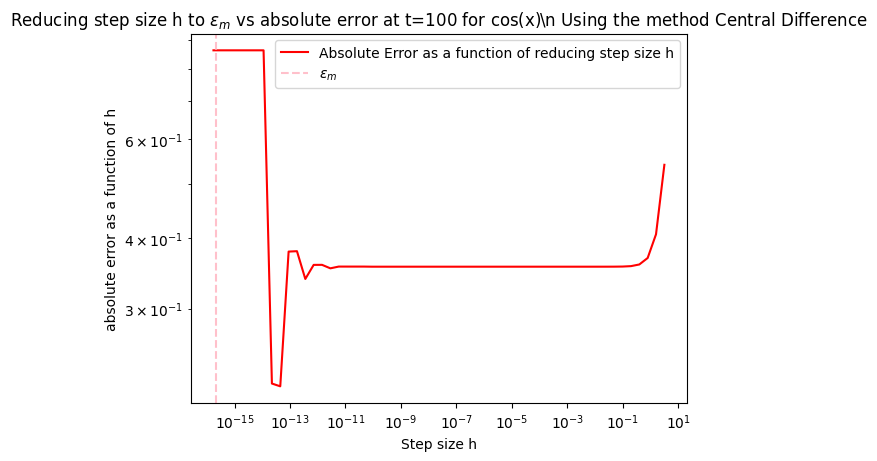

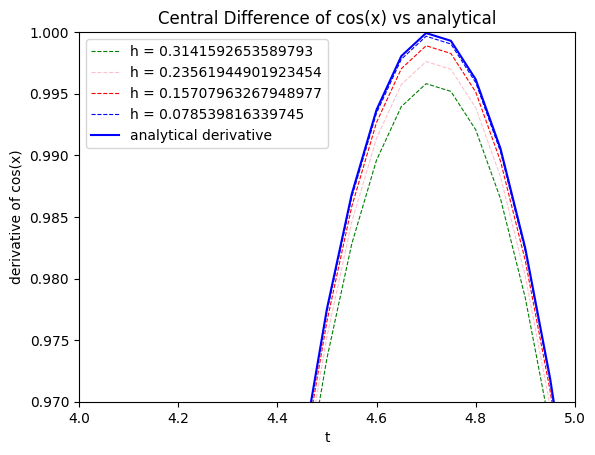

round  0


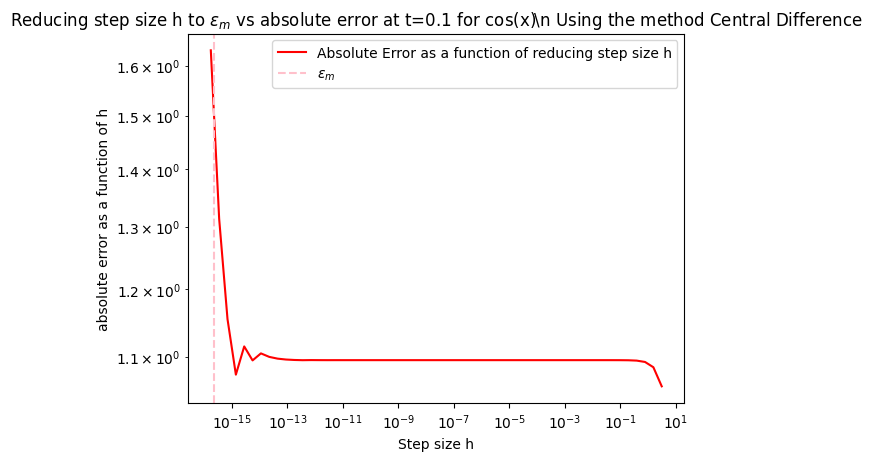

round  1


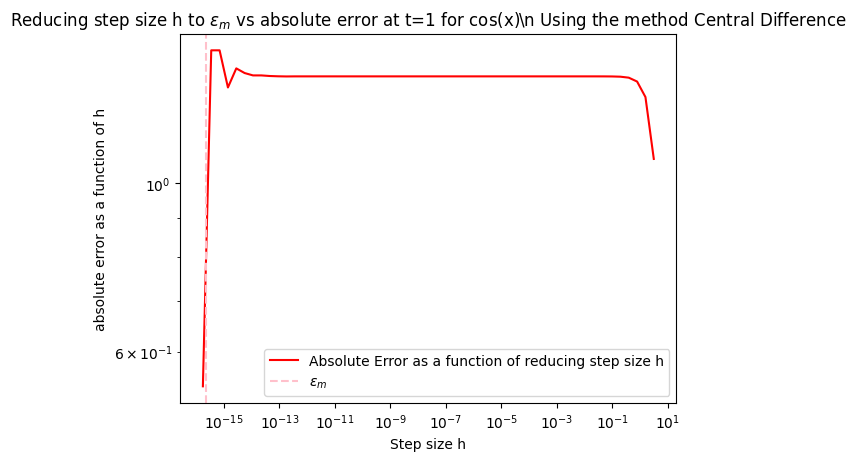

round  2


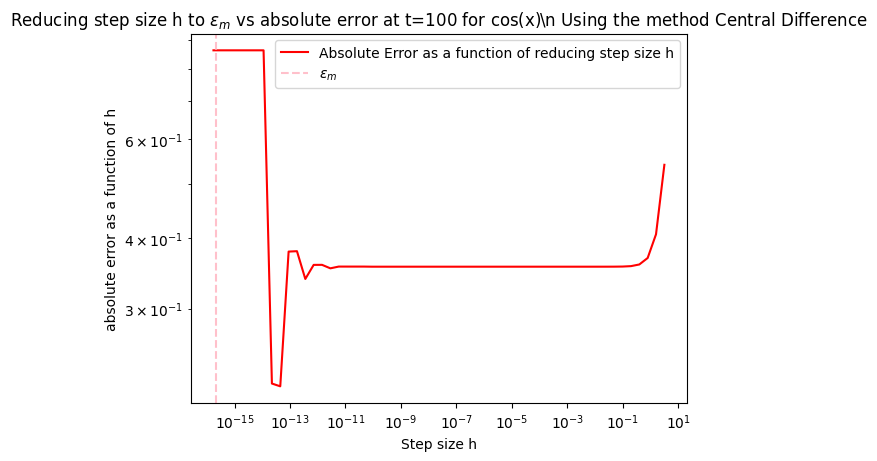

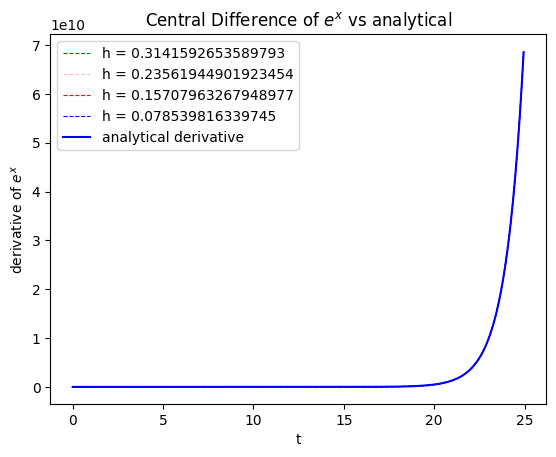

round  0


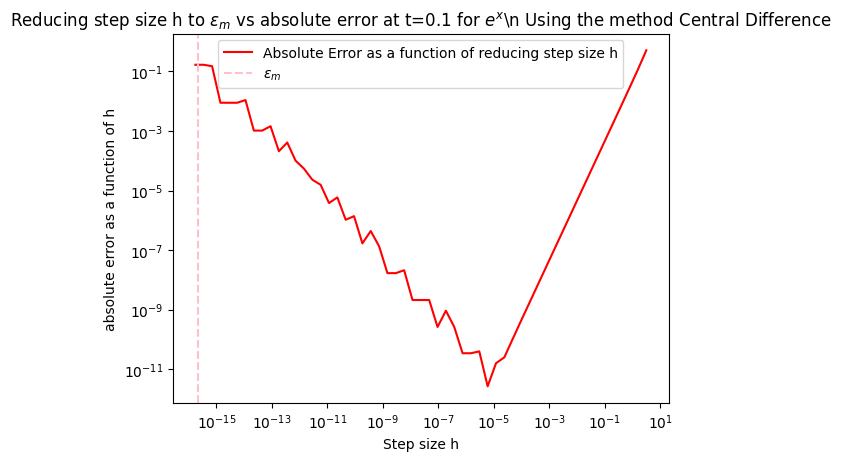

round  1


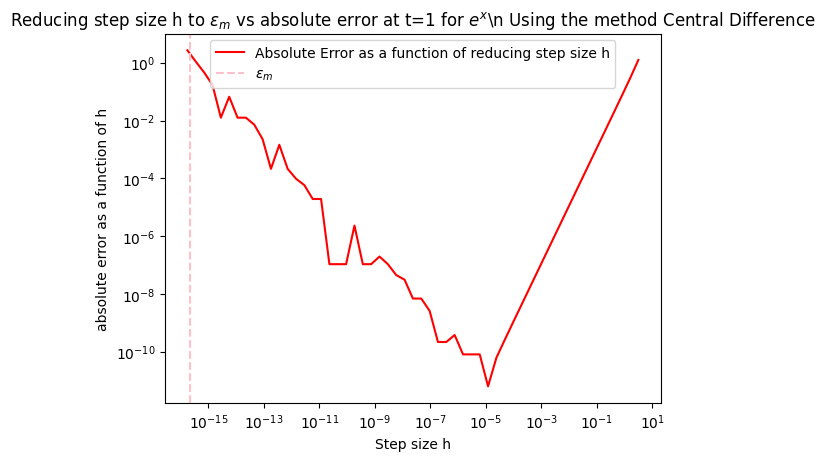

round  2


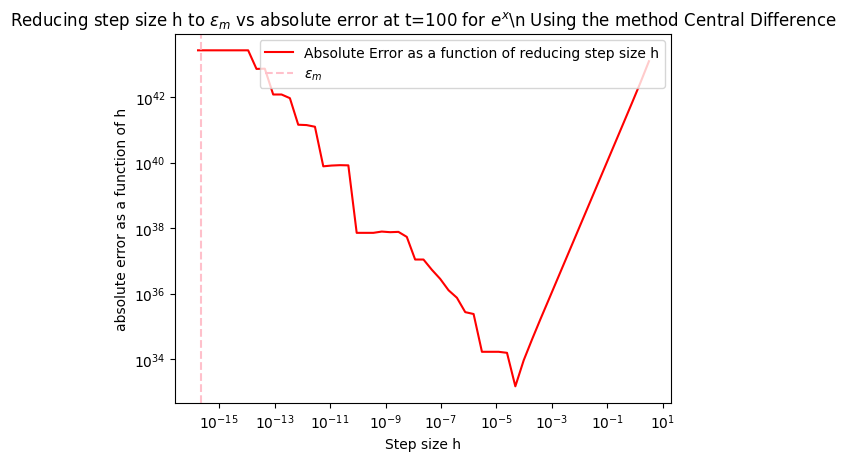

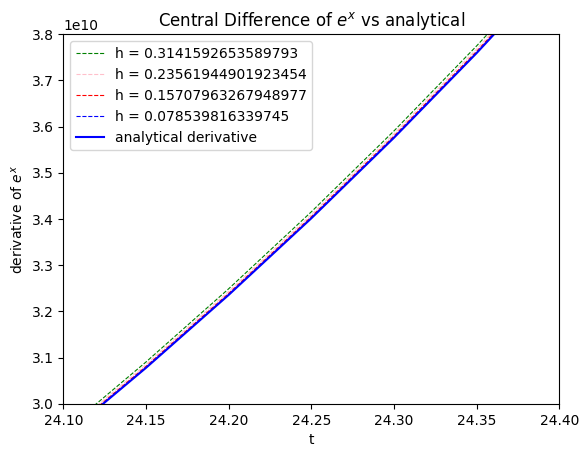

round  0


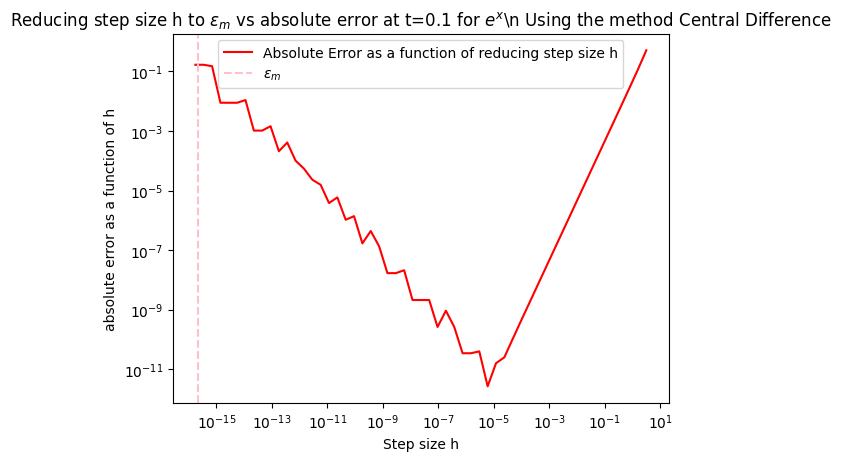

round  1


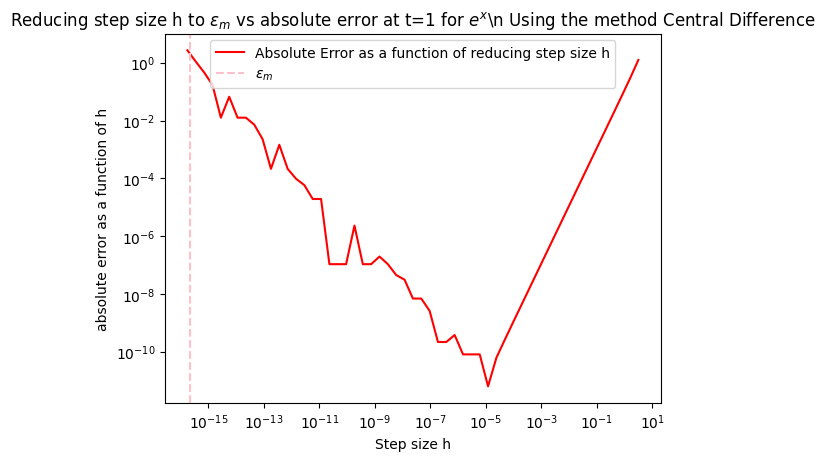

round  2


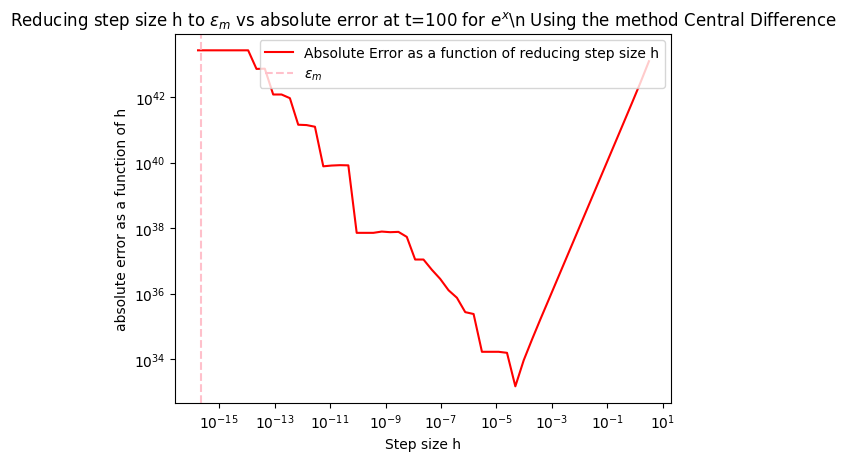

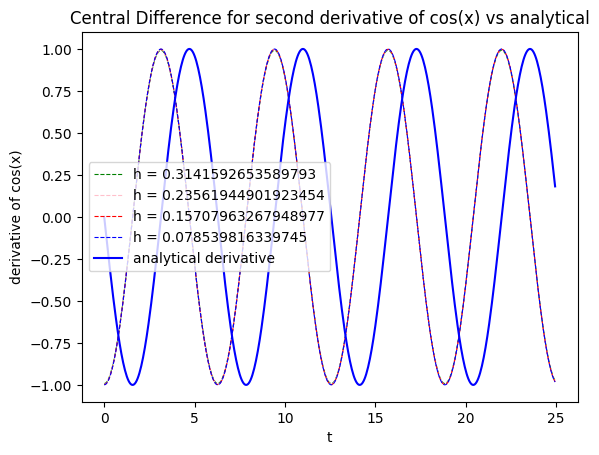

round  0
h is smaller than epsilon, cd2 function returning float.


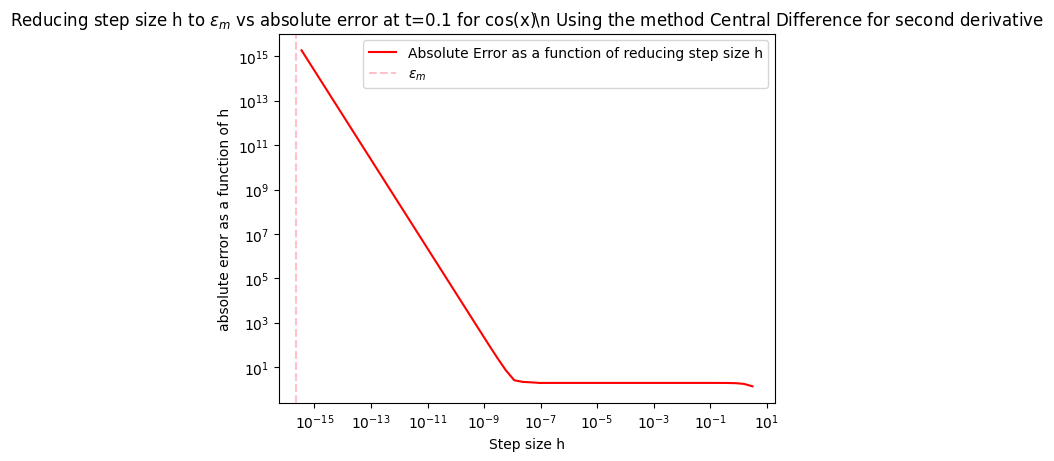

round  1
h is smaller than epsilon, cd2 function returning float.


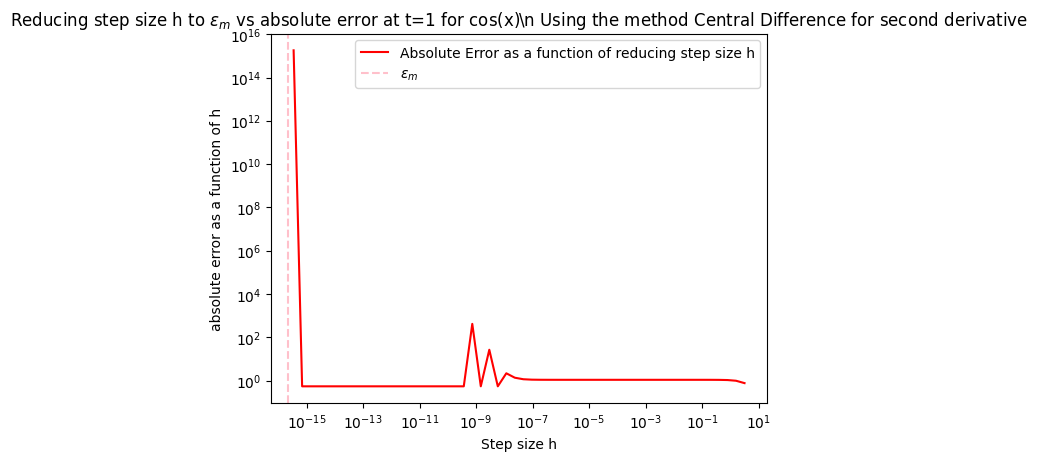

round  2
h is smaller than epsilon, cd2 function returning float.


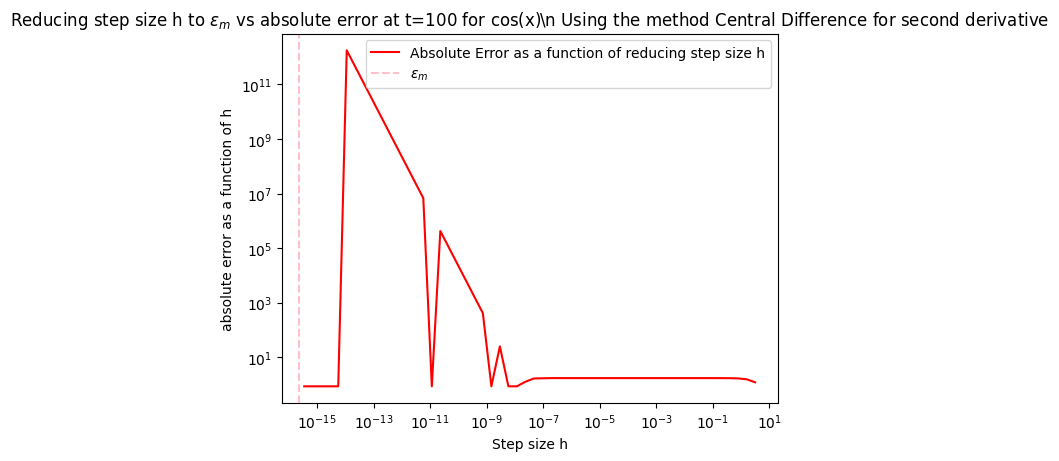

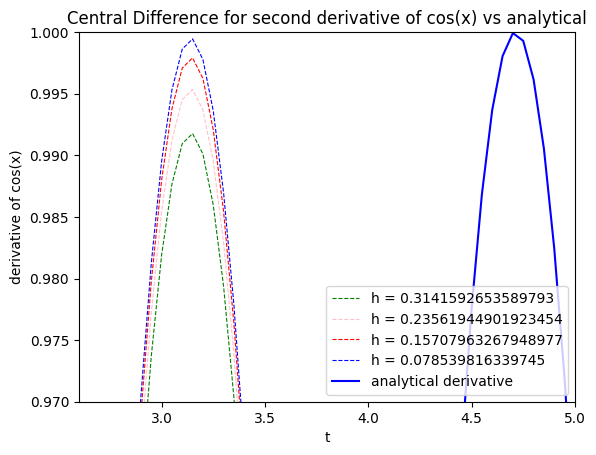

round  0
h is smaller than epsilon, cd2 function returning float.


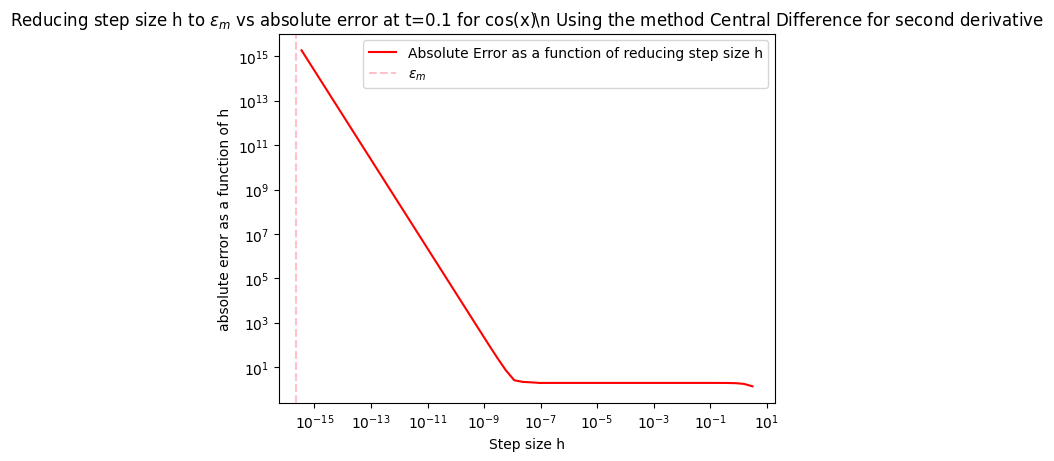

round  1
h is smaller than epsilon, cd2 function returning float.


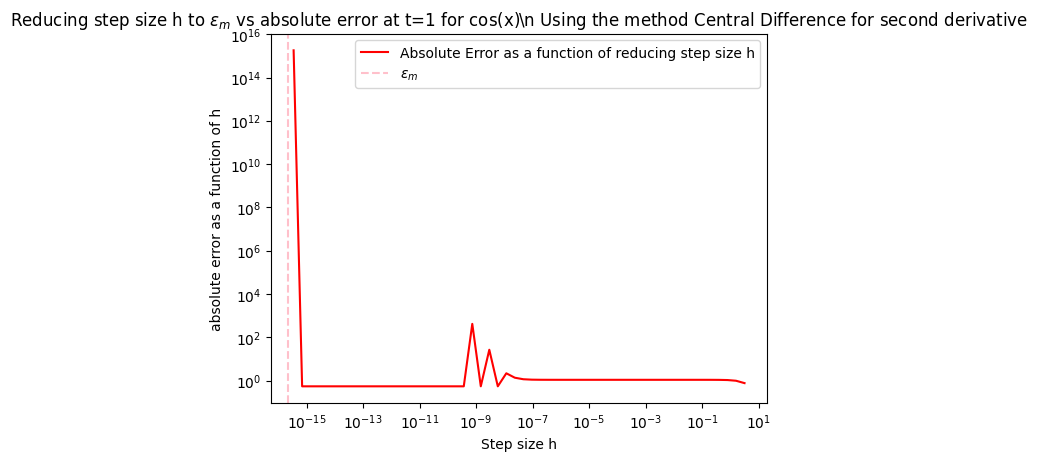

round  2
h is smaller than epsilon, cd2 function returning float.


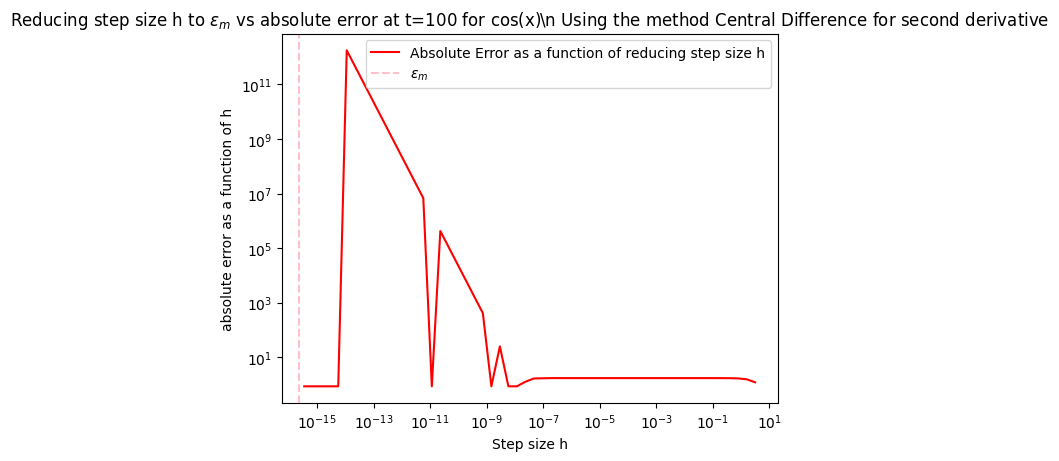

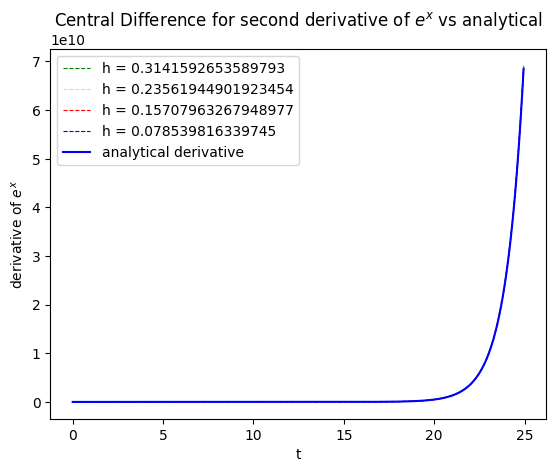

round  0
h is smaller than epsilon, cd2 function returning float.


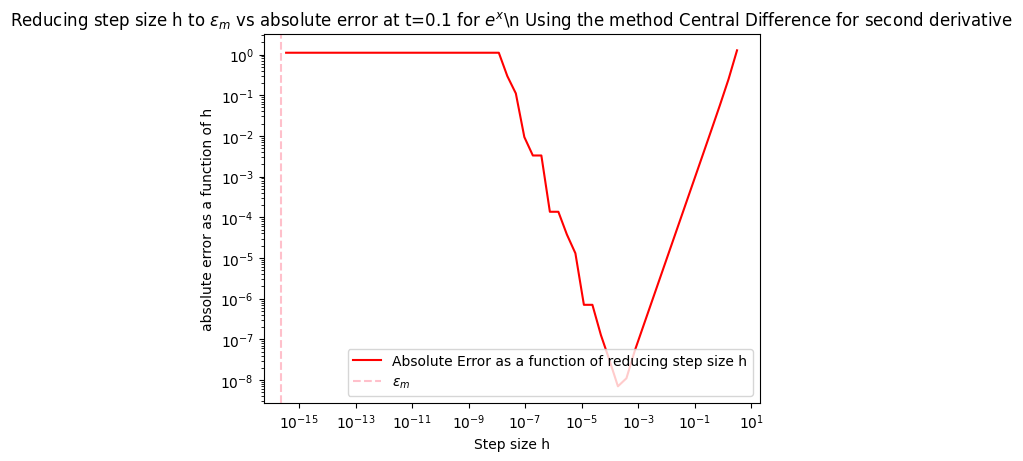

round  1
h is smaller than epsilon, cd2 function returning float.


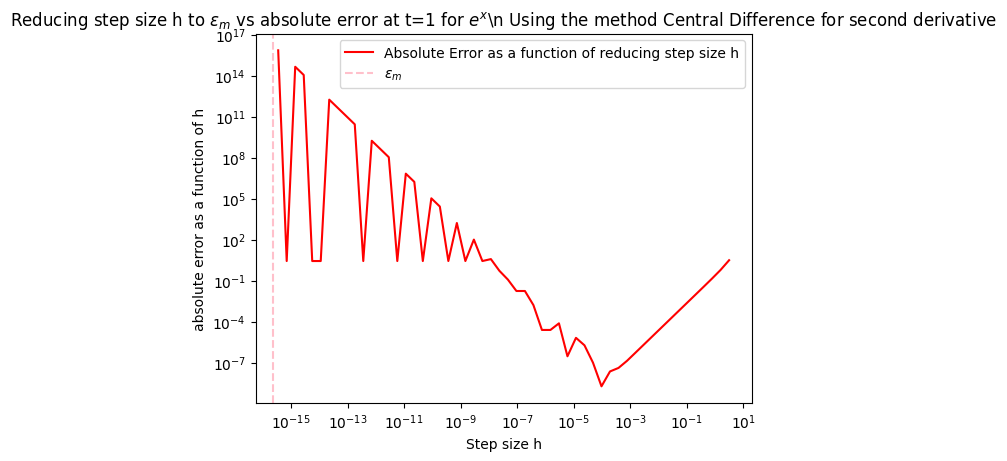

round  2
h is smaller than epsilon, cd2 function returning float.


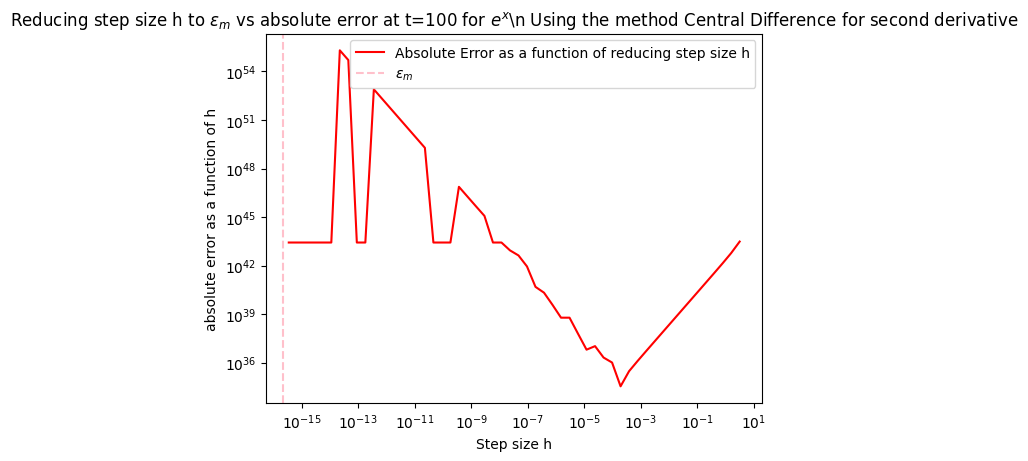

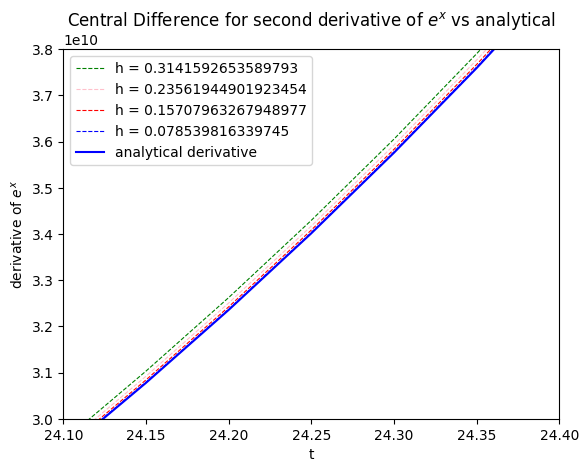

round  0
h is smaller than epsilon, cd2 function returning float.


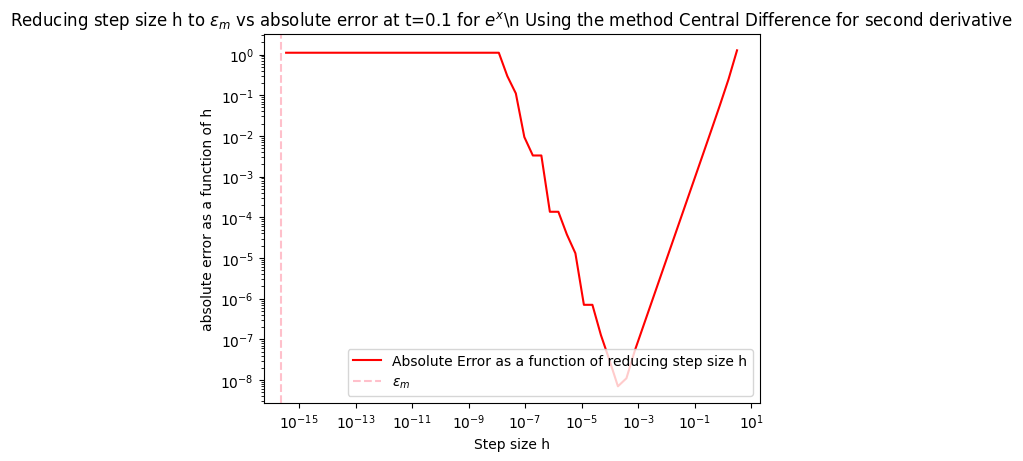

round  1
h is smaller than epsilon, cd2 function returning float.


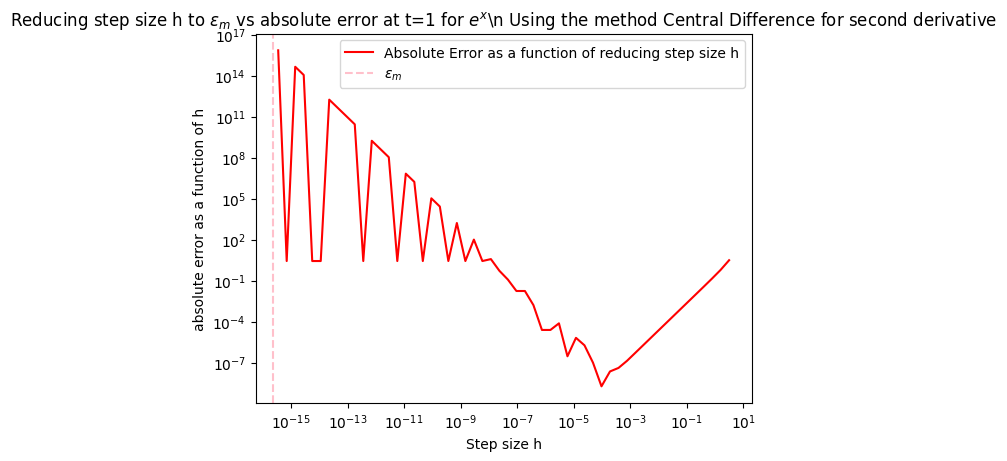

round  2
h is smaller than epsilon, cd2 function returning float.


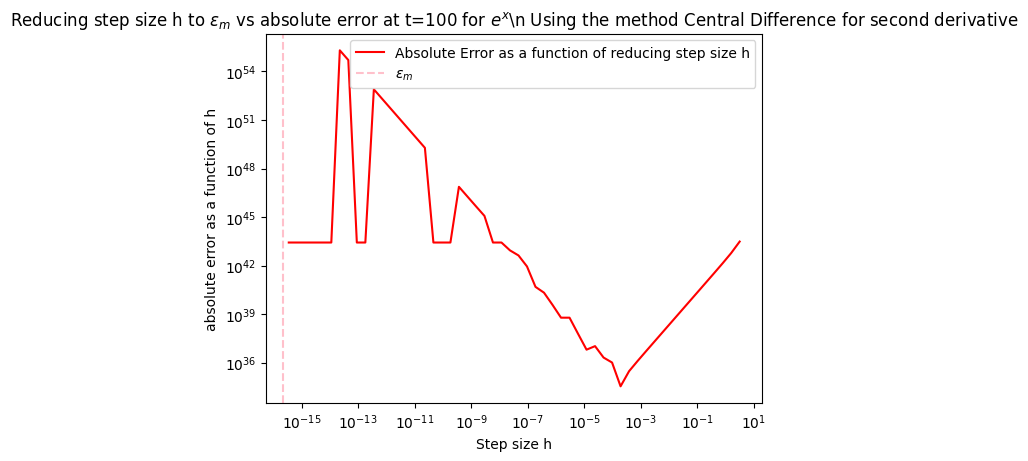

<Figure size 640x480 with 0 Axes>

In [40]:
import os
import numpy as np
"""part one"""

hlist = np.linspace((np.pi)/10, 2.220446049250313e-16, 5)
listnum=[0,1,2,3]
t= np.arange(0, 25, 0.05)

name = ['cos(x)', '$e^x$']
fu = [fd, cd, cd2]
funame = ['Forward Differrence', 'Central Difference', 'Central Difference for second derivative']

#ccreating a dictionary: 
points_of_interest = [5, 10, 15, 20]  #values of 't'

#dictionary to store results for each method and function
results = {
    'method': [],
    'function': [],
    'point': [],
    'stepsize': [],
    'num_d': [],
    'anal_d': [],
    'rel_error': []
}

N = 1000
tlist= (0.1, 1, 100)

pathdir = '1.4.1a_plots/'
if not os.path.exists(pathdir):
    os.makedirs(pathdir)

float_epsilon = np.finfo(float).eps


for k in range(3): #controlling the method used
    f = fu[k]
    for z in range(2):#controlling the function used (e^x or cos(x))
        if z ==0:
            func = y
            funcd = dy
        if z ==1:
            func = g
            funcd = dg
                
        #to collect the derivatives at t points of interest we use a loop 
        for t_point in points_of_interest:
            for h in hlist:  # for each step size
                #nmerical and analytical derivative using the calculated function
                num_d= f(func, t_point, h)
                anal_d = funcd(t_point)
                
                #relative error
                rel_error = abs(num_d - anal_d) / abs(anal_d)

                # Store the results
                results['method'].append(funame[k])
                results['function'].append(name[z])
                results['point'].append(t_point)
                results['stepsize'].append(h)
                results['num_d'].append(num_d)
                results['anal_d'].append(anal_d)
                results['rel_error'].append(rel_error)
                
        for m in range(2): #making the plots
            if z== 0 and m ==1: 
                plt.xlim(4,5)
                plt.ylim(0.97, 1)
            if z==1 and m == 1:  #limits
                plt.xlim(24.1, 24.4)
                plt.ylim(3e10, 3.8e10)
            if k==2 and z==0 and m==1:  #limits
                plt.xlim(2.6,5)
                plt.ylim(0.97, 1)
            
            plt.plot(t, f(func, t, hlist[0]), label = 'h = %s'%hlist[0],  linestyle = '--', linewidth = 0.8, color = 'green')
            plt.plot(t, f(func, t, hlist[1]), label = 'h = %s'%hlist[1],  linestyle = '--', linewidth = 0.8, color = 'pink')
            plt.plot(t, f(func, t, hlist[2]), label = 'h = %s'%hlist[2],  linestyle = '--', linewidth = 0.8, color = 'red')
            plt.plot(t, f(func, t, hlist[3]), label = 'h = %s'%hlist[3],  linestyle = '--', linewidth = 0.8, color = 'blue')

            plt.plot(t, funcd(t), color='blue', label = "analytical derivative")
                
            plt.title(fr"{funame[k]} of {name[z]} vs analytical") 
            plt.ylabel(fr"derivative of {name[z]}")                      
            plt.xlabel("t")  
            plt.legend()

            #SAVE the plot to the directory
            pathdir = '1.4.1a_plots/derivatives'
            if not os.path.exists(pathdir):
                os.makedirs(pathdir)
            save_path = os.path.join(pathdir, fr"{funame[k]}derivatives{name[z]}{m}.png")
            plt.savefig(save_path)  #save the figure as a .png file
            #print(f"Plot saved to: {save_path}")

            #show the plot
            plt.show()

            #clear figure so plots dont overlap.
            plt.clf()
        
            for r in range(len(tlist)):
                tt = tlist[r]
                hh = 2*np.pi
                dlist = []
                rlist = []
                hslist = []
                print('round ', r)
                for n in range(N):
                    hh = hh/2
                    j = dif(f, func, tt ,hh)
                    dlist.append(j)
                    hslist.append(hh)
                    if hh < float_epsilon or np.isnan(h):
                        #print('h has reached', h, 'plots now being made. ')
                        plt.loglog(hslist, dlist, label=fr"Absolute Error as a function of reducing step size h", color='red')
                        plt.title(fr"Reducing step size h to $\epsilon_m$ vs absolute error at t={tt} for {name[z]}\n Using the method {funame[k]}")
                        plt.ylabel(fr"absolute error as a function of h")                      
                        plt.xlabel("Step size h")  
                        plt.axvline(x=float_epsilon, color='pink', linestyle='--', label=r'$\epsilon_{m}$')
                        plt.legend()
                        
                        #SAVE the plot to the directory
                        pathdir = '1.4.1a_plots/absolute_errors'
                        if not os.path.exists(pathdir):
                            os.makedirs(pathdir)
                        save_path = os.path.join(pathdir, f"difference_with_{tt}_for_{name[z]}.png")
                        plt.savefig(save_path)  #save the figure as a .png file
                        #print(f"Plot saved to: {save_path}")

                        #show the plot
                        plt.show()

                        #clear figure so plots dont overlap.
                        plt.clf()
                        break
            

        


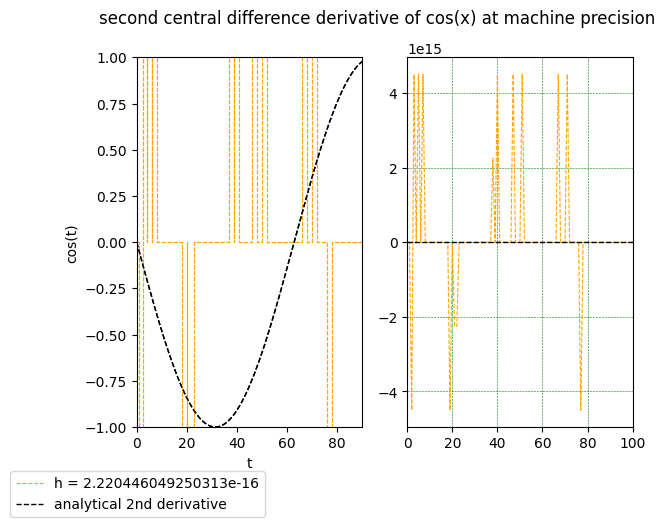

In [32]:
fig, (ax2, ax1) = plt.subplots(1, 2)
ax2.plot(cd2(y, t, hlist[4]), label = 'h = %s'%hlist[4], linestyle = '--', linewidth = 0.8, color = 'orange')
ax2.plot(dy(t), label = 'analytical 2nd derivative', linestyle = '--', linewidth = 1, color= 'black')

fig.suptitle('second central difference derivative of cos(x) at machine precision')
ax2.set_xlabel('t')
ax2.set_ylabel('cos(t)')
ax2.set_xlim(0,90)
ax2.set_ylim(-1,1)

#futher away
ax2.plot(cd2(y, t,hlist[4]), label="_nolegend_" , linestyle = '--', linewidth = 0.8, color = 'orange')
ax2.plot(dy(t), label="_nolegend_" , linestyle = '--', linewidth = 1, color= 'black')

#close up
ax1.plot(cd2(y, t,hlist[4]), label = 'h = %s'%hlist[4], linestyle = '--', linewidth = 0.8,color = 'orange')
ax1.plot(dy(t), label = 'analytical 2nd derivative', linestyle = '--', linewidth = 1, color= 'black')
ax1.set_xlim(0,100)

ax2.legend(bbox_to_anchor = (0.6, -0.1), ncol=1) 
ax1.grid(color = 'green', linestyle = '--', linewidth = 0.4)
plt.show()

In [33]:

#using pandaas-- first convert to data frame, then make a tabele and print it
df_results = pd.DataFrame(results)

print(df_results)

#save table to csv
df_results.to_csv('derivatives_results.csv', index=False)  #index=False so dataframe excluded from results. 
print("CSV file saved as 'derivatives_results.csv'")

                                       method function  point      stepsize  \
0                         Forward Differrence   cos(x)      5  3.141593e-01   
1                         Forward Differrence   cos(x)      5  2.356194e-01   
2                         Forward Differrence   cos(x)      5  1.570796e-01   
3                         Forward Differrence   cos(x)      5  7.853982e-02   
4                         Forward Differrence   cos(x)      5  2.220446e-16   
..                                        ...      ...    ...           ...   
115  Central Difference for second derivative    $e^x$     20  3.141593e-01   
116  Central Difference for second derivative    $e^x$     20  2.356194e-01   
117  Central Difference for second derivative    $e^x$     20  1.570796e-01   
118  Central Difference for second derivative    $e^x$     20  7.853982e-02   
119  Central Difference for second derivative    $e^x$     20  2.220446e-16   

            num_d        anal_d  rel_error  
0    8